# 🧪 BioOpti: Optimization Toolkit for Biochemistry

## 📚 Notebook Structure
1. [Introduction](#introduction)  
2. [Project Functionality Overview](#project-functionality-overview)  
3. [Demonstrations](#demonstrations)  
4. [Visualizations & Interactive Tools](#visualizations--interactive-tools)  
5. [Challenges & Limitations](#challenges--limitations)  
6. [Conclusion & Future Work](#conclusion--future-work)

## 👋 Introduction

### 🤔 What is BioOpti ?
**BioOpti** is a Python-based toolkit designed to assist researchers, students, and professionals in optimizing biochemical processes. It provides modules for **culture media optimization** and **enzyme reaction simulations**.
This project was developed as part of a programming course and integrates concepts from biochemistry, modeling, and software engineering to create a functional and flexible tool.

### 🎯 Project Goals
# ⚠️⚠️⚠️To adapt at the end of the project

Our main goals are to:
- Optimize culture media composition based on specific organism requirements.
- Simulate enzymatic reaction rates considering parameters like substrate concentration, temperature, pH, and competitive inhibition.



## 🛠️ Project Functionality Overview

BioOpti is organized as a modular Python package located in the `src/bioopti/` folder. Each module handles a specific task.

# ⚠️⚠️⚠️TO COMPLETE BY PIETRO AND MARC 


### 🔬 `reaction_simulator.py`: Simulates enzymatic reaction rates using a modified Michaelis-Menten model

  This module incorporates:
  - Substrate concentration effects based on `Km` and `Vmax`.
  - Environmental factors such as pH and temperature, modeled using Gaussian penalty functions to reflect enzyme stability.
  - Optional competitive inhibition, adjusting the effective `Km` to account for inhibitor presence.  
  Users can easily simulate reactions through the `simulate_from_local_data()` function, which:
  - Loads enzyme-specific parameters from a local dataset (`data/enzyme_data.json`).
  - Applies optimal pH, temperature, and inhibition constants when available.
  - Computes and returns the expected reaction rate based on user inputs.


### ⚠️⚠️⚠️OPTIMIZATION TOOL BY WILLY 


## 🎬 Demonstrations

# ⚠️⚠️⚠️ COMPLTE WITH DEMO FOR CULUTRE MDEIA OPTIMIZATION
# ⚠️⚠️⚠️ Complete wih optimization tool after my part 


## 🔬 Simulation of Enzymatic Reactions

In this section, we’ll simulate enzymatic reaction rates under various conditions using both manual inputs and real enzyme data.
Each subsection will demonstrate a distinct use case of the simulation engine:

1. 🧬 **Basic Simulation with Hardcoded Parameters**: Run a simple simulation using manually defined Km, Vmax, pH, and temperature values.

2. ⚡ **Effect of pH on Enzyme Activity**: See how deviations from optimal pH affect the reaction rate using Gaussian penalty modeling.

3. 🔥 **Simulation with Real Enzyme Parameters**: Load parameters from `enzyme_data.json` and simulate reactions under custom environmental conditions.

4. ⏯️ **Impact of Competitive Inhibition**: Visualize how increasing inhibitor concentration reduces reaction velocity for a real enzyme.


### 🧬 1. Basic Simulation with Hardcoded Parameters

In this first example, we'll manually define all the parameters needed to simulate an enzymatic reaction rate using the `simulate_reaction_rate()` function.
This will allow us to:
- Understand how the function works without relying on any external data files
- Explore the influence of substrate concentration, pH, and temperature
- See how penalties are applied when conditions deviate from the enzyme’s optimal environment

Do not hesitate to play with the parameter to see how that affects the raction rate !

In [18]:
import sys
import os
sys.path.append(os.path.abspath("../src/bioopti")) #Adds the path to the src/bioopti/ directory
from reaction_simulator import simulate_reaction_rate #Imports the function from the package


# Define manual parameters
substrate_conc = 0.2       # [S] in mM
vmax = 100.0               # Vmax in µmol/min
km = 0.1                   # Km in mM
ph = 7.2                   # Current pH
temp = 36.0                # Current temperature in °C
optimal_ph = 7.0           # Optimal pH for the enzyme
optimal_temp = 37.0        # Optimal temperature in °C
ph_sigma = 1.0             # Tolerance for pH deviation
temp_sigma = 5.0           # Tolerance for temperature deviation

# Run the simulation
rate = simulate_reaction_rate(
    substrate_conc=substrate_conc,
    vmax=vmax,
    km=km,
    ph=ph,
    temp=temp,
    optimal_ph=optimal_ph,
    optimal_temp=optimal_temp,
    ph_sigma=ph_sigma,
    temp_sigma=temp_sigma
)

# Display the result
print(f"Simulated reaction rate: {rate:.2f} µmol/min")


Simulated reaction rate: 64.05 µmol/min


### ⚡ 2. Exploring the Effect of pH

In this section, we'll see how enzymatic activity changes as the pH moves away from the optimal value.
Therefore, we'll simulate the reaction rate across a range of pH values while keeping all other factors constant. This illustrates the Gaussian penalty effect built into the simulation model.
This simulation will allow us to:
- Visualize the sensitivity of enzymatic activity to pH deviation
- Understand how `optimal_pH` and `ph_sigma` shape the enzyme's environmental tolerance
- Interpret the biological importance of operating enzymes near their optimal condition

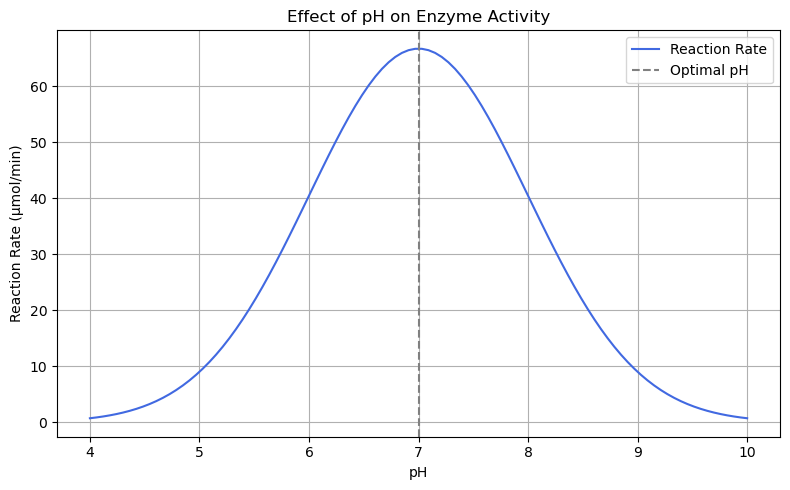

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from reaction_simulator import simulate_reaction_rate #Reuse the core function from the module

#Define fixed enzyme parameters
substrate_conc = 0.2  # mM
vmax = 100.0          # µmol/min
km = 0.1              # mM
temp = 37.0           # °C
optimal_ph = 7.0
ph_sigma = 1.0
optimal_temp = 37.0
temp_sigma = 5.0

#Generate a range of pH values to test
ph_values = np.linspace(4.0, 10.0, 100)
rates = []

#Simulate the reaction rate for each pH
for ph in ph_values:
    rate = simulate_reaction_rate(
        substrate_conc=substrate_conc,
        vmax=vmax,
        km=km,
        ph=ph,
        temp=temp,
        optimal_ph=optimal_ph,
        optimal_temp=optimal_temp,
        ph_sigma=ph_sigma,
        temp_sigma=temp_sigma
    )
    rates.append(rate)

#Plot the results
plt.figure(figsize=(8, 5))
plt.plot(ph_values, rates, label="Reaction Rate", color="royalblue")
plt.axvline(optimal_ph, color='gray', linestyle='--', label="Optimal pH")
plt.title("Effect of pH on Enzyme Activity")
plt.xlabel("pH")
plt.ylabel("Reaction Rate (µmol/min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔥 3. Simulation Using Real Enzyme Parameters

Now, let's simulate an enzymatic reaction by automatically extracting kinetic and environmental parameters from the local dataset (`enzyme_data.json`).
This will allow us to:
- Simulate enzymes under realistic conditions
- Avoid hardcoding `Vmax`, `Km`, or optimal pH/temperature values
- Demonstrate how `simulate_from_local_data()` works

Again, do not hesitate to play with the enzyme, organism or environmental conditions !

In [8]:
from reaction_simulator import simulate_from_local_data #Import the function to simulate using local enzyme data

#Define which enzyme and organism to simulate
enzyme_name = "hexokinase" 
organism = "Homo sapiens"

#Set environmental conditions
substrate_conc = 0.6  # mM
ph = 7.4             # environmental pH
temp = 38.0           # environmental temperature

#Run the simulation
rate, params = simulate_from_local_data(
    enzyme_name=enzyme_name,
    organism=organism,
    substrate_conc=substrate_conc,
    ph=ph,
    temp=temp
)

#Display the result
print(f"Simulated rate for {enzyme_name} ({organism}): {rate:.2f} µmol/min")
print("Parameters used:")
for key, value in params.items():
    print(f"  {key}: {value}")


📁 Loading enzyme data from: /Users/clarabergonzi/Desktop/BioOpti/data/enzyme_data.json
Simulated rate for hexokinase (Homo sapiens): 79.35 µmol/min
Parameters used:
  km: 0.05
  vmax: 95.0
  optimal_pH: 7.2
  optimal_temp: 36.0
  ph_sigma: 1.0
  temp_sigma: 5.0
  ki: 0.15


### ⏯️ 4. Visualizing Effects of Competitive Inhibition

In this part, we'll look at the impact of competitive inhibition on enzymatic activity.
Using real enzyme parameters from our dataset, we'll simulate how the reaction rate changes as the inhibitor concentration increases,  reflecting the adjustment of the apparent Km in the presence of inhibitors according to the Michaelis-Menten model with competitive inhibition.
This simulation will allow us to:
- Observe how increasing [I] reduces enzyme activity
- Understand how Ki values influence sensitivity to inhibitors
- Explore dynamic responses of a real enzyme to competitive inhibition

📁 Loading enzyme data from: /Users/clarabergonzi/Desktop/BioOpti/data/enzyme_data.json


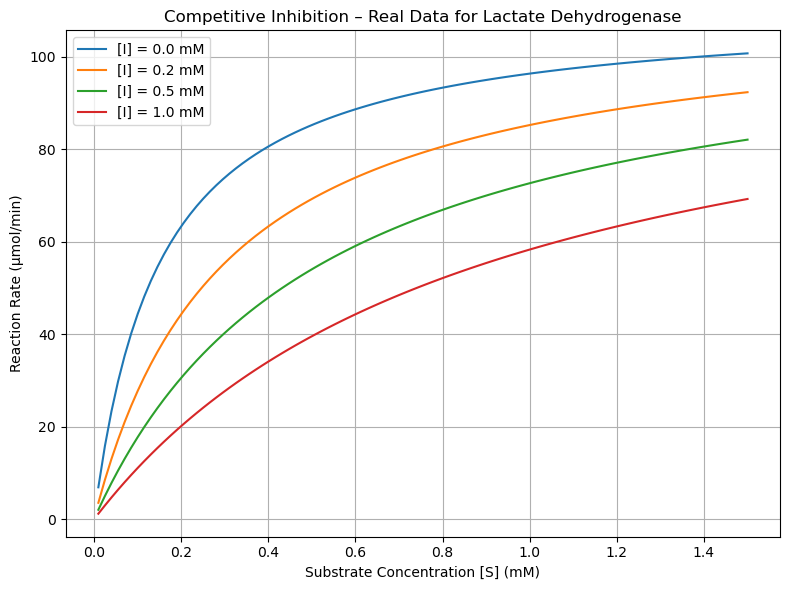

In [9]:
#Imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../src/bioopti")) #Add src/bioopti/ to sys.path
from reaction_simulator import get_enzyme_kinetics, simulate_reaction_rate #Import the simulation tools

#Load enzyme parameters from JSON
enzyme = "lactate dehydrogenase"
organism = "Homo sapiens"
params = get_enzyme_kinetics(enzyme, organism)

#Extract parameters
vmax = params["vmax"]
km = params["km"]
optimal_ph = params["optimal_pH"]
optimal_temp = params["optimal_temp"]
ph_sigma = params["ph_sigma"]
temp_sigma = params["temp_sigma"]
ki = params["ki"]

#Set environmental conditions
ph = 7.0
temp = 37.0

#Define substrate range and inhibitor concentrations
substrate_concs = np.linspace(0.01, 1.5, 100)
inhibitor_levels = [0.0, 0.2, 0.5, 1.0]

#Plot reaction rate curves for varying inhibitor concentrations
plt.figure(figsize=(8, 6))

for inhibitor_conc in inhibitor_levels:
    rates = [
        simulate_reaction_rate(
            substrate_conc=S,
            vmax=vmax,
            km=km,
            ph=ph,
            temp=temp,
            optimal_ph=optimal_ph,
            optimal_temp=optimal_temp,
            ph_sigma=ph_sigma,
            temp_sigma=temp_sigma,
            inhibitor_conc=inhibitor_conc,
            ki=ki
        )
        for S in substrate_concs
    ]

    plt.plot(substrate_concs, rates, label=f"[I] = {inhibitor_conc} mM")

#Final plot formatting
plt.xlabel("Substrate Concentration [S] (mM)")
plt.ylabel("Reaction Rate (µmol/min)")
plt.title(f"Competitive Inhibition – Real Data for {enzyme.title()}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🕹️ Section 4 – Visualizations & Interactivity

Let’s now bring BioOpti to life with interactive widgets!

### ⚠️⚠️⚠️COMPLTE FOR CULUTRE MDEIA OPTIMIZATION 
### ⚠️⚠️⚠️COMPLTE FOR OPTIMIZATION TOOL





### 🔬 Simulation of enzymatic reactions

Now that we understood how the functions frome the `reaction_simulator.py` module work, let’s see in real time how the reaction rate changes under different conditions for **lactate dehydrogenase (Homo sapiens)**.

In this simulation, you can adjust:
- Substrate concentration `[S]`
- pH of the environment
- Temperature in °C
- Competitive inhibitor concentration `[I]`

The simulation uses kinetic parameters loaded from the local `enzyme_data.json` file:
- **Km**: Michaelis constant
- **Vmax**: Maximum reaction rate
- **Ki**: Inhibition constant

Each time you move a slider, the model recomputes the reaction rate using a modified Michaelis-Menten equation with environmental penalty functions and competitive inhibition modeling.

In [39]:
#Imports
import sys
import os
from ipywidgets import interact, FloatSlider
sys.path.append(os.path.abspath("../src/bioopti")) # Ensure the src/bioopti folder is in the path
from reaction_simulator import simulate_reaction_rate, get_enzyme_kinetics
json_path = os.path.join("..", "data", "enzyme_data.json") #Path to enzyme_data.json

#Define the interactive simulation function
def interactive_simulation(
    substrate_conc=0.5,
    ph=7.0,
    temp=37.0,
    inhibitor_conc=0.0
):
    #Load enzyme parameters from the JSON file
    params = get_enzyme_kinetics(
        enzyme_name="lactate dehydrogenase",
        organism="Homo sapiens",
        filepath=json_path
    )

    #Run the simulation
    rate = simulate_reaction_rate(
        substrate_conc=substrate_conc,
        vmax=params["vmax"],
        km=params["km"],
        ph=ph,
        temp=temp,
        optimal_ph=params["optimal_pH"],
        optimal_temp=params["optimal_temp"],
        ph_sigma=params["ph_sigma"],
        temp_sigma=params["temp_sigma"],
        inhibitor_conc=inhibitor_conc,
        ki=params["ki"]
    )

    # Display results
    print(f"⚡ Predicted Reaction Rate: {rate:.4f} µmol/min\n")
    print("📊 Enzyme Parameters:")
    print(f"   • Km   = {params['km']} mM")
    print(f"   • Vmax = {params['vmax']} µmol/min")
    print(f"   • Ki   = {params['ki']} mM")

#Create interactive sliders
interact(
    interactive_simulation,
    substrate_conc=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.05, description="[S] (mM)"),
    ph=FloatSlider(value=7.0, min=5.5, max=9.0, step=0.1, description="pH"),
    temp=FloatSlider(value=37.0, min=20.0, max=50.0, step=0.5, description="Temperature (°C)"),
    inhibitor_conc=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.05, description="[I] (mM)")
)

interactive(children=(FloatSlider(value=0.5, description='[S] (mM)', max=2.0, min=0.01, step=0.05), FloatSlide…

<function __main__.interactive_simulation(substrate_conc=0.5, ph=7.0, temp=37.0, inhibitor_conc=0.0)>

## 💬 Section 5 – Challenges & Limitations

### ⚠️⚠️⚠️COMPLTE FOR CULUTRE MDEIA OPTIMIZATION 
### ⚠️⚠️⚠️COMPLTE FOR OPTIMIZATION TOOL


While developing BioOpti, we encountered several technical and scientific challenges. Here's a short overview of the main limitations we faced and how we addressed (or plan to address) them:

### 🧪 Biological Modeling Challenges
- **Simplified kinetics**: We used a modified Michaelis-Menten model with Gaussian penalties for pH and temperature. While this provides useful approximations, it doesn’t capture complex regulatory mechanisms (e.g. allosteric effects, cooperativity).
- **Estimated values**: Parameters like `ph_sigma`, `temp_sigma`, and `Ki` had to be approximated, since such data is not always available. This can impact the accuracy of the simulations.
- **Single-substrate assumption**: The current model handles only single-substrate reactions. Multi-substrate and cofactor-dependent models are not yet implemented.

### 💻 Software & Implementation Challenges
- **Data format consistency**: Our enzyme dataset had to be carefully structured to avoid `KeyError`s. Adding default handling helped avoid runtime crashes.

### 👥 Teamwork & Collaboration
- We had to divide work across multiple modules (data loading, simulation, optimization). Using a clear repo structure and frequent commits helped us coordinate.
- Writing clean interfaces between modules allowed each team member to focus on their part without breaking the others’ work.

---

### 🛠️ Next Steps
To improve BioOpti in future iterations, we would like to:
- Expand the model to multi-substrate reactions
- Add support for additional inhibition types (non-competitive, uncompetitive)
- Pull real kinetic data directly from BRENDA or SABIO-RK using API queries

## ✅ Section 6 – Conclusion & Future Work

### ⚠️⚠️⚠️ TO COMPLETE 


### 🔍 What We Achieved



---

### 🙌 Final Thoughts



